In [1]:
# ------------------------------
# 📌 IMPORTS
# ------------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

# Optional (like in first notebook)
from sklearn.feature_selection import SelectKBest, f_regression

plt.style.use('seaborn-v0_8')
sns.set_palette("husl")


In [2]:
# ------------------------------
# 📌 LOAD DATASET
# ------------------------------

df = pd.read_excel("Task_students_performance_dataset.xlsx")
print("Dataset Loaded Successfully!")

df.head()


Dataset Loaded Successfully!


,Student_ID,Gender,Study_Hours_per_Week,Attendance_Percentage,Previous_Sem_Score,Parental_Education,Internet_Access,Family_Income,Tutoring_Classes,Sports_Activity,Extra_Curricular,School_Type,Sleep_Hours,Travel_Time,Test_Anxiety_Level,Peer_Influence,Teacher_Feedback,Motivation_Level,Library_Usage_per_Week,Final_Score
0,S1000,Male,36.330635,86.628815,38.182863,Postgraduate,No,32727.500387,No,Yes,No,Private,6.777112,2.488956,4.526416,1.698767,Good,9.416549,4,44.293533
1,S1001,Female,9.582476,73.504255,95.788249,High School,No,42332.567312,No,Yes,No,Private,6.631231,2.192993,5.920305,8.459841,Excellent,4.382245,4,42.749974
2,S1002,Male,5.795795,65.453321,73.939564,High School,Yes,44142.273093,No,No,Yes,Private,5.311059,0.887486,5.788195,4.140011,Excellent,7.373097,5,29.846049
3,S1003,Male,19.578110,94.381263,53.443393,Graduate,Yes,64498.434188,No,No,Yes,Private,6.380781,1.267095,6.313880,5.694395,Good,5.281190,6,44.030395
4,S1004,Male,39.426018,46.671849,39.749045,Postgraduate,No,42105.884774,No,No,Yes,Private,4.266327,0.397970,1.551979,8.150371,Poor,7.069597,6,42.548877


In [3]:
# ------------------------------
# 📌 BASIC INFO
# ------------------------------
print("\n📊 Dataset Overview:")
display(df.head())

print("\n📈 Dataset Info:")
print(df.info())

print("\n🔍 Missing Values:")
print(df.isnull().sum())




📊 Dataset Overview:


,Student_ID,Gender,Study_Hours_per_Week,Attendance_Percentage,Previous_Sem_Score,Parental_Education,Internet_Access,Family_Income,Tutoring_Classes,Sports_Activity,Extra_Curricular,School_Type,Sleep_Hours,Travel_Time,Test_Anxiety_Level,Peer_Influence,Teacher_Feedback,Motivation_Level,Library_Usage_per_Week,Final_Score
0,S1000,Male,36.330635,86.628815,38.182863,Postgraduate,No,32727.500387,No,Yes,No,Private,6.777112,2.488956,4.526416,1.698767,Good,9.416549,4,44.293533
1,S1001,Female,9.582476,73.504255,95.788249,High School,No,42332.567312,No,Yes,No,Private,6.631231,2.192993,5.920305,8.459841,Excellent,4.382245,4,42.749974
2,S1002,Male,5.795795,65.453321,73.939564,High School,Yes,44142.273093,No,No,Yes,Private,5.311059,0.887486,5.788195,4.140011,Excellent,7.373097,5,29.846049
3,S1003,Male,19.578110,94.381263,53.443393,Graduate,Yes,64498.434188,No,No,Yes,Private,6.380781,1.267095,6.313880,5.694395,Good,5.281190,6,44.030395
4,S1004,Male,39.426018,46.671849,39.749045,Postgraduate,No,42105.884774,No,No,Yes,Private,4.266327,0.397970,1.551979,8.150371,Poor,7.069597,6,42.548877



📈 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Student_ID              300 non-null    object 
 1   Gender                  300 non-null    object 
 2   Study_Hours_per_Week    300 non-null    float64
 3   Attendance_Percentage   300 non-null    float64
 4   Previous_Sem_Score      300 non-null    float64
 5   Parental_Education      300 non-null    object 
 6   Internet_Access         300 non-null    object 
 7   Family_Income           300 non-null    float64
 8   Tutoring_Classes        300 non-null    object 
 9   Sports_Activity         300 non-null    object 
 10  Extra_Curricular        300 non-null    object 
 11  School_Type             300 non-null    object 
 12  Sleep_Hours             300 non-null    float64
 13  Travel_Time             300 non-null    float64
 14  Test_Anxiety_Level      3

In [4]:
# ------------------------------
# 📌 OPTIONAL CLEANING
# ------------------------------
# If any missing values exist:
df = df.dropna()
print("\nAfter dropping NA:", df.shape)




After dropping NA: (300, 20)


In [5]:
# ------------------------------
# 📌 LABEL ENCODING (for categorical columns)
# ------------------------------

label_enc = LabelEncoder()

cat_cols = df.select_dtypes(include=['object']).columns

for col in cat_cols:
    df[col] = label_enc.fit_transform(df[col])

print("\nEncoded columns:", list(cat_cols))
df.head()




Encoded columns: ['Student_ID', 'Gender', 'Parental_Education', 'Internet_Access', 'Tutoring_Classes', 'Sports_Activity', 'Extra_Curricular', 'School_Type', 'Teacher_Feedback']


,Student_ID,Gender,Study_Hours_per_Week,Attendance_Percentage,Previous_Sem_Score,Parental_Education,Internet_Access,Family_Income,Tutoring_Classes,Sports_Activity,Extra_Curricular,School_Type,Sleep_Hours,Travel_Time,Test_Anxiety_Level,Peer_Influence,Teacher_Feedback,Motivation_Level,Library_Usage_per_Week,Final_Score
0,0,1,36.330635,86.628815,38.182863,2,0,32727.500387,0,1,0,0,6.777112,2.488956,4.526416,1.698767,2,9.416549,4,44.293533
1,1,0,9.582476,73.504255,95.788249,1,0,42332.567312,0,1,0,0,6.631231,2.192993,5.920305,8.459841,1,4.382245,4,42.749974
2,2,1,5.795795,65.453321,73.939564,1,1,44142.273093,0,0,1,0,5.311059,0.887486,5.788195,4.140011,1,7.373097,5,29.846049
3,3,1,19.578110,94.381263,53.443393,0,1,64498.434188,0,0,1,0,6.380781,1.267095,6.313880,5.694395,2,5.281190,6,44.030395
4,4,1,39.426018,46.671849,39.749045,2,0,42105.884774,0,0,1,0,4.266327,0.397970,1.551979,8.150371,3,7.069597,6,42.548877


In [12]:
# -------------------------------
# 📌 FEATURE SELECTION (optional)
# -------------------------------

X = df.drop("Final_Score", axis=1)   # ← your real target column
y = df["Final_Score"]

from sklearn.feature_selection import SelectKBest, f_regression
import pandas as pd

selector = SelectKBest(score_func=f_regression, k='all')
selector.fit(X, y)

feature_scores = pd.DataFrame({
    "Feature": X.columns,
    "Score": selector.scores_
}).sort_values(by="Score", ascending=False)

feature_scores


,Feature,Score
4,Previous_Sem_Score,199.174533
2,Study_Hours_per_Week,82.030228
3,Attendance_Percentage,37.790640
5,Parental_Education,3.862836
18,Library_Usage_per_Week,3.768607
7,Family_Income,2.438567
16,Teacher_Feedback,1.905498
14,Test_Anxiety_Level,0.550372
13,Travel_Time,0.424474
8,Tutoring_Classes,0.379394


In [13]:
# ------------------------------
# 📌 TRAIN-TEST SPLIT
# ------------------------------

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("\nTrain shape:", X_train.shape)
print("Test shape:", X_test.shape)



Train shape: (240, 19)
Test shape: (60, 19)


In [14]:
# ------------------------------
# 📌 SCALING (optional, like original code)
# ------------------------------

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [15]:
# ------------------------------
# 📌 TRAIN THE MODEL
# ------------------------------

model = LinearRegression()
model.fit(X_train_scaled, y_train)

print("Model Training Completed!")


Model Training Completed!


In [16]:
# ------------------------------
# 📌 PREDICTIONS & EVALUATION
# ------------------------------

y_pred = model.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("\n📊 Model Evaluation:")
print("MSE:", mse)
print("RMSE:", rmse)
print("R² Score:", r2)



📊 Model Evaluation:
MSE: 40.43381659237494
RMSE: 6.3587590450004425
R² Score: 0.569230619416014


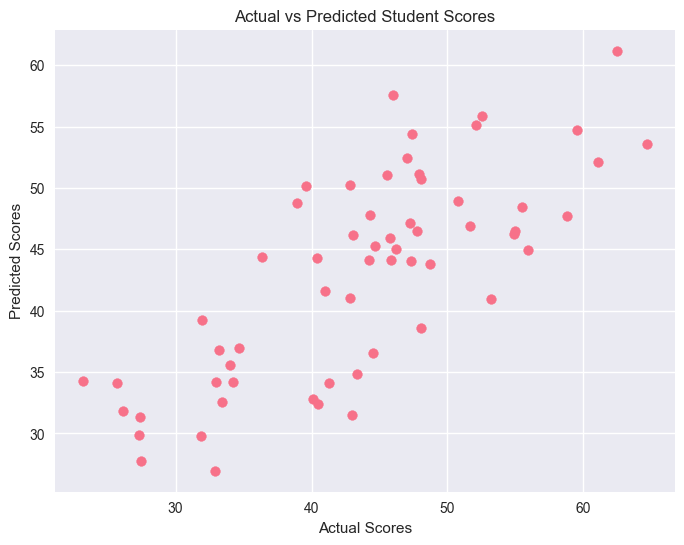

In [17]:
# ------------------------------
# 📌 VISUALIZATION: Predicted vs Actual
# ------------------------------

plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Scores")
plt.ylabel("Predicted Scores")
plt.title("Actual vs Predicted Student Scores")
plt.show()

